# Things I had to do in the terminal before being able to use this notebook


## Use conda to build Python env with osmnx as main so that not upto date version in dependancies used but workable for osmnx

conda config --prepend channels conda-forge

conda create -n ox --strict-channel-priority osmnx

## go into env
conda activate ox

## install other libs that are needed for visulization
conda install matplotlib
conda install numpy
conda install -c anaconda ipykernel

## makes conda env into a kernel which then can be used by jupyter notebook
python -m ipykernel install --user --name=ox

## other Tool for queries to OpenStreetMap in testing phase
pip install OSMPythonTools


In [167]:
import osmnx as ox
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
%matplotlib inline




In [168]:
# Specify the name that is used to seach for the data
#place_name = "Heinsberg, Nordrhein-Westfalen, Germany"
place_name = "Gangelt, Kreis Heinsberg, Nordrhein-Westfalen, Germany"

# Fetch OSM street network from the location, only once! takes forever  
graph = ox.graph_from_place(place_name)
area = ox.gdf_from_place(place_name)
buildings = ox.footprints_from_place(place_name)

In [4]:
area.to_file('datafiles/Area_Heinsberg.geojson', driver='GeoJSON')
red_buildings.to_file('datafiles/Buildings_Heinsberg.geojson', driver='GeoJSON')


NameError: name 'red_buildings' is not defined

In [179]:
#a1 = gpd.read_file('datafiles/Area_Heinsberg.geojson')
r1 = gpd.read_file('datafiles/Buildings_Gangelt.geojson')

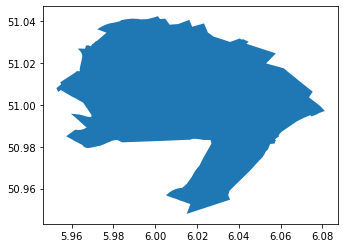

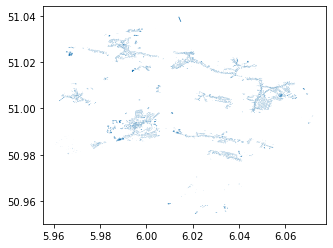

In [180]:
#r1 = gpd.read_file('datafiles/Buildings_Heinsberg.geojson')
area.plot()
r1.plot()



In [174]:
red_buildings.columns

Index(['building', 'geometry', 'amenity', 'healthcare',
       'healthcare:speciality', 'building:levels', 'school_type', 'rooms',
       'type', 'members', 'building_coordinates_x', 'building_coordinates_y',
       'neighbourhood'],
      dtype='object')

In [ ]:
red_buildings.columns

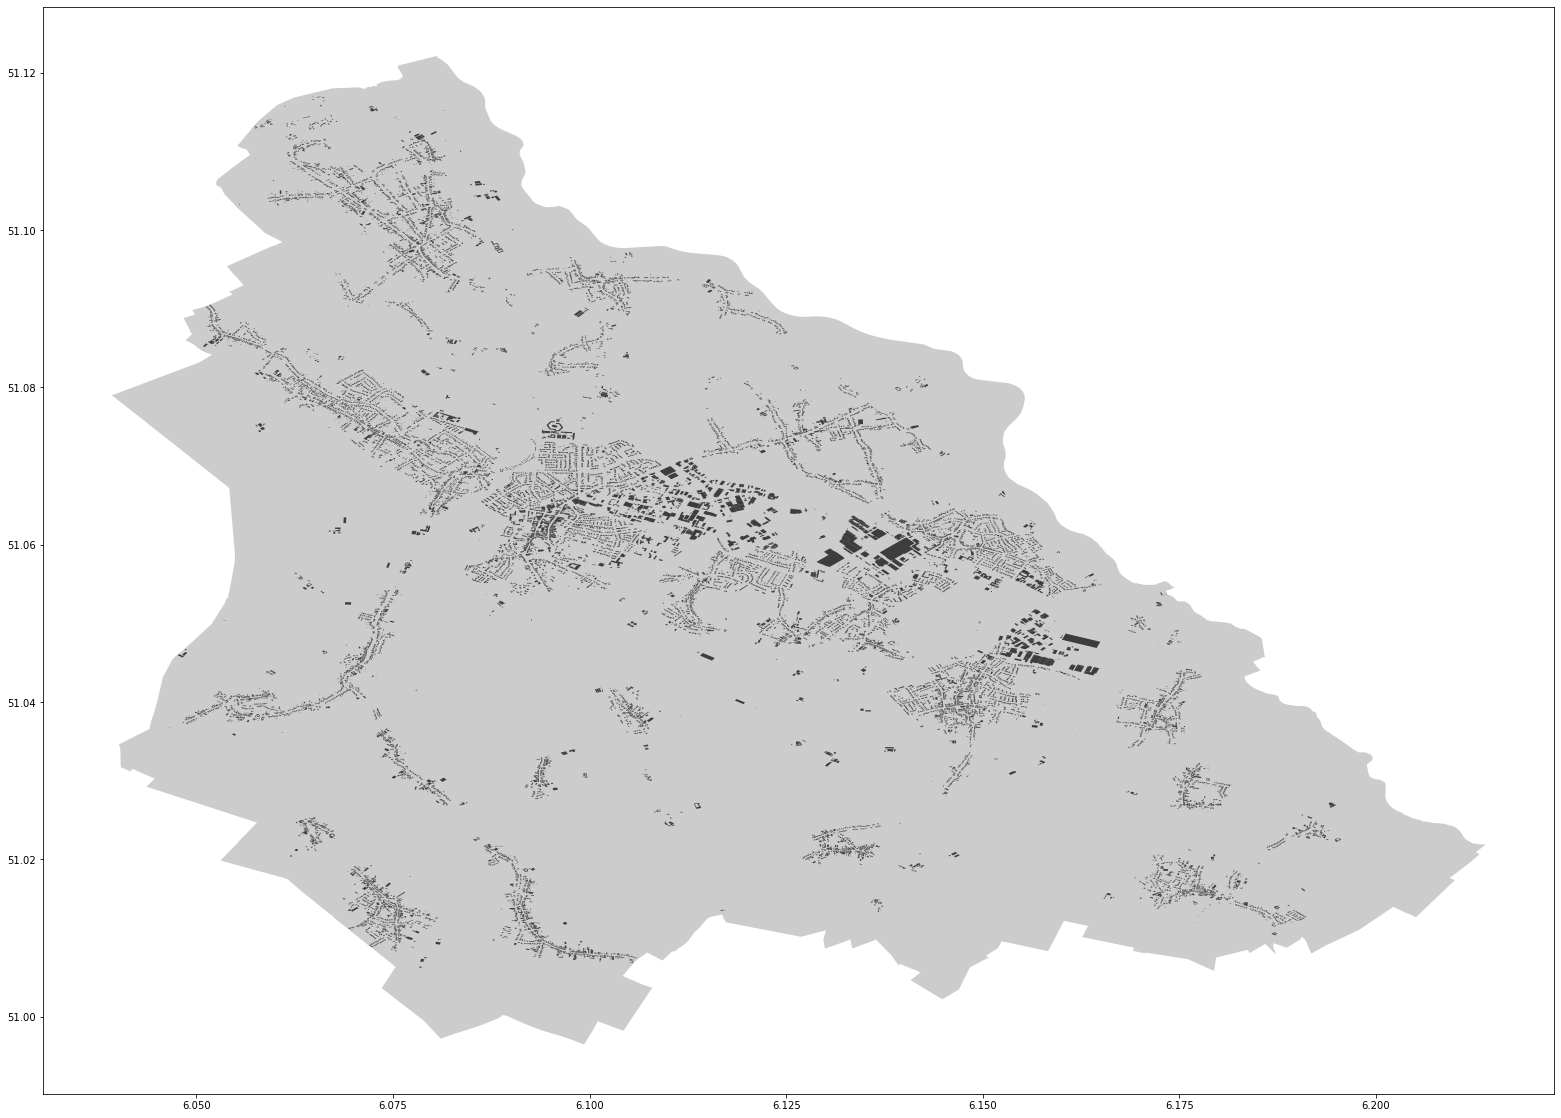

In [36]:
fig, ax = plt.subplots(figsize=(40,20))
area.plot(ax=ax, facecolor='black', alpha=0.2)
buildings.plot(ax=ax, facecolor='black', alpha=0.7)

In [136]:
from shapely.geometry import Point, LineString, Polygon
red_buildings.head()
#point=(6.075,51.05) 
point=Point(6.075,51.05)
list_of_n = [Point(6.1,51.06),Point(6.075,51.05),Point(6.145,51.035),Point(6.07,51.10)] 

def closest_n(list_of_n,point):
    '''return index of nearest neighbourhood center'''
    distances = [point.distance(x) for x in list_of_n]        
    return distances.index(min(distances))  


closest_n(list_of_n,Point(6.13,51.45))

3

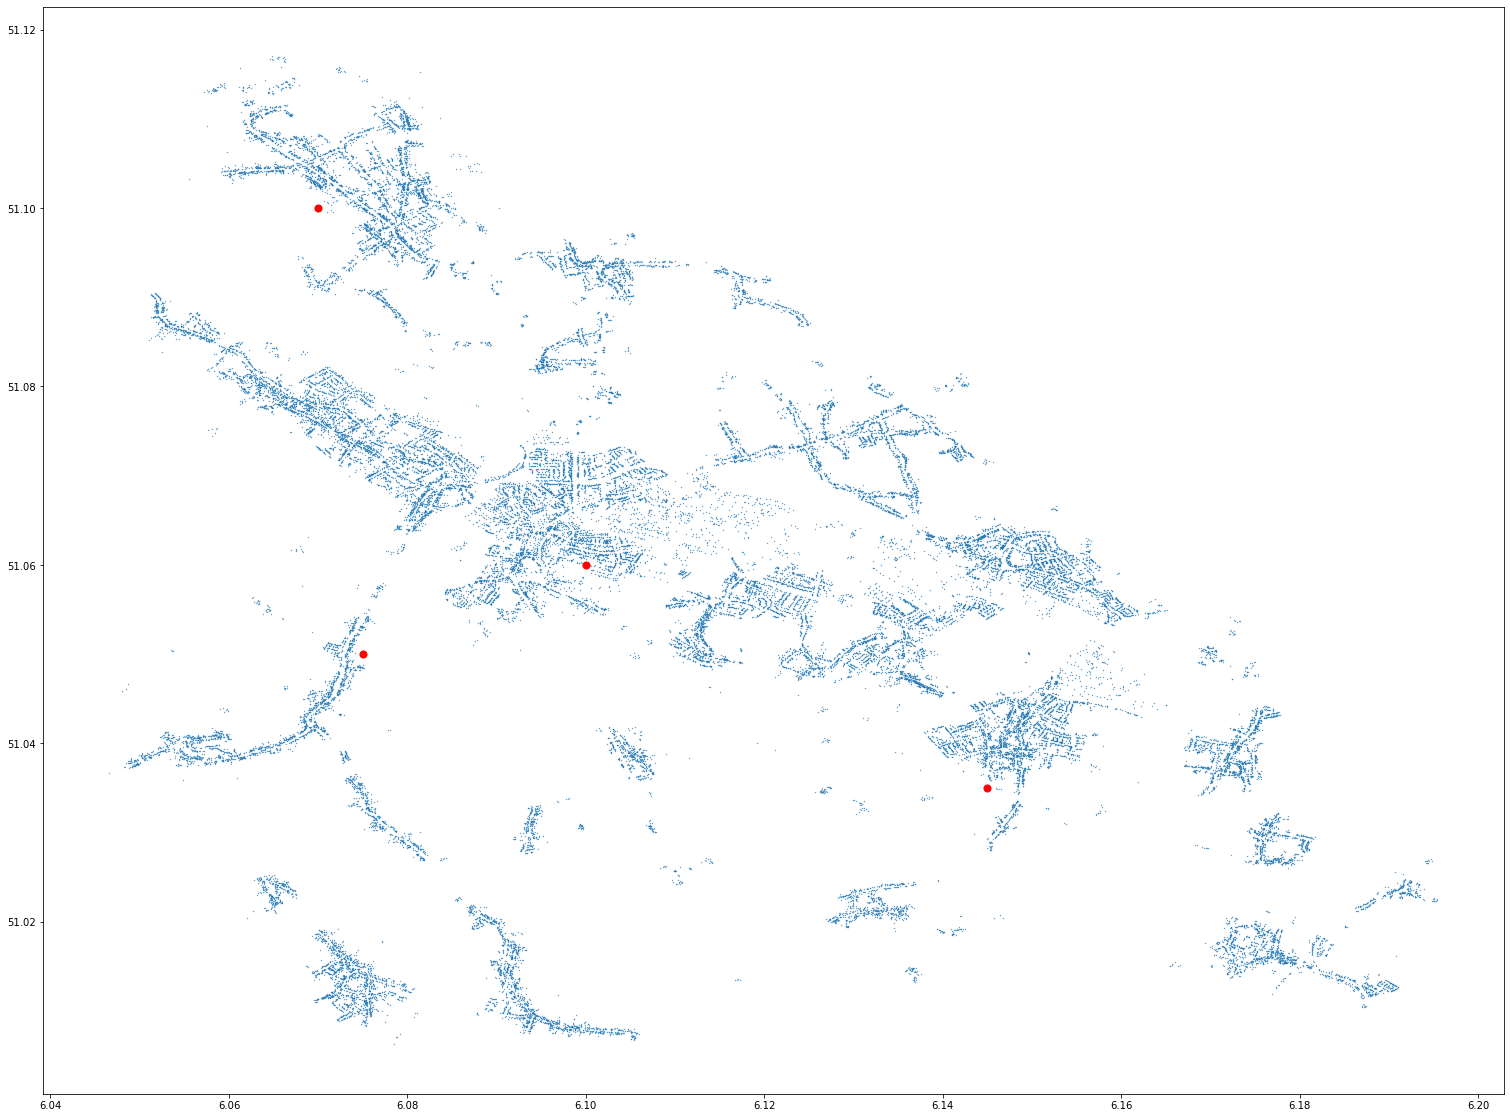

In [137]:
#plt.plot(centroid_coords)
#neighbourhood plot
b=buildings.copy()
fig, ax = plt.subplots(figsize=(40,20))
b['geometry']=centroid_coords
b.plot(ax=ax,markersize=0.1)
for p in list_of_n:
    plt.scatter(p.x,p.y, c='r', s=50)
#plt.xlim(6.08,6.10)
#plt.ylim(51.06,51.07)

In [141]:

centroid_coords = [x.centroid for x  in buildings['geometry']]
neighbourhoods = [closest_n(list_of_n,x) for x in centroid_coords]
red_buildings['neighbourhood'] = neighbourhoods

In [166]:
np.zeros((10,10))

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [176]:
red_buildings

,building,geometry,amenity,healthcare,healthcare:speciality,building:levels,school_type,rooms,type,members,building_coordinates_x,building_coordinates_y,neighbourhood
47237525,yes,"POLYGON ((6.05763 51.11314, 6.05758 51.11310, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.057594,51.113031,3
47237528,yes,"POLYGON ((6.06553 51.11694, 6.06556 51.11689, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.065656,51.116945,3
47237529,yes,"POLYGON ((6.05812 51.11325, 6.05805 51.11319, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.058146,51.113194,3
47237530,yes,"POLYGON ((6.06128 51.11579, 6.06134 51.11572, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.061269,51.115741,3
47237531,yes,"POLYGON ((6.05826 51.11348, 6.05833 51.11345, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.058254,51.113423,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3582989,yes,"POLYGON ((6.14833 51.05855, 6.14846 51.05850, ...",NaN,NaN,NaN,NaN,NaN,NaN,multipolygon,"{266892301: 'outer', 266893507: 'inner'}",6.148426,51.058243,2
3582990,yes,"POLYGON ((6.15162 51.05512, 6.15189 51.05503, ...",NaN,NaN,NaN,NaN,NaN,NaN,multipolygon,"{266892316: 'outer', 39575520: 'inner', 266893...",6.151574,51.055172,2
3582991,yes,"POLYGON ((6.14962 51.05602, 6.14986 51.05628, ...",NaN,NaN,NaN,NaN,NaN,NaN,multipolygon,"{266892321: 'outer', 266893506: 'inner', 26689...",6.150379,51.055964,2
3586442,yes,"POLYGON ((6.12296 51.06657, 6.12317 51.06651, ...",NaN,NaN,NaN,NaN,NaN,NaN,multipolygon,"{267213109: 'outer', 267213206: 'inner', 26721...",6.123244,51.066129,0


In [142]:
red_buildings['neighbourhood'].unique()

array([3, 2, 0, 1])

### voronoi prob

In [51]:
from geovoronoi import voronoi_regions_from_coords
area_shape = area.geometry

coords = np.array([[6.080,51.03],
                   [6.175,51.02],
                   [6.075,51.08],
                   [6.125,51.07]])

poly_shapes, pts, poly_to_pt_assignments = voronoi_regions_from_coords(coords, area_shape)

AttributeError: 'GeoSeries' object has no attribute '_geom'

array([[0.71573446, 0.46064655],
       [0.85835456, 0.14403405],
       [0.37349787, 0.30544166],
       [0.17343466, 0.84934391],
       [0.31565269, 0.17479319],
       [0.43357483, 0.27798074],
       [0.45579519, 0.12789278],
       [0.56420342, 0.39924268],
       [0.81507806, 0.87415972],
       [0.37784983, 0.7568412 ]])

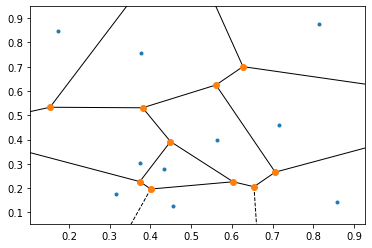

In [13]:
from scipy.spatial import Voronoi, voronoi_plot_2d
points = np.random.random((10, 2))
vor = Voronoi(points)
voronoi_plot_2d(vor)
vor.points

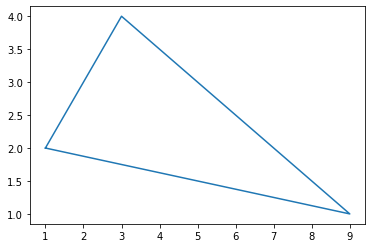

In [14]:


from shapely.geometry import Point, LineString, Polygon
p = Polygon([(1,2),(3,4),(9,1)])
area.geometry
x,y = p.exterior.xy
plt.plot(x,y)

In [ ]:
from geovoronoi import voronoi_regions_from_coords

poly_shapes, pts, poly_to_pt_assignments = voronoi_regions_from_coords(coords, area_shape)


In [8]:

cols = ['building','geometry','amenity','healthcare','healthcare:speciality','building:levels','school_type','rooms','type','members']
red_buildings =buildings[cols].copy()

polies=buildings['geometry'].values
poly = polies[0]
poly.area*1e8

2.8750385000723155

In [9]:
centroid_coords_x = [x.centroid.x for x  in buildings['geometry']]
centroid_coords_y = [x.centroid.y for x  in buildings['geometry']]
red_buildings['building_coordinates_x']=centroid_coords_x
red_buildings['building_coordinates_y']=centroid_coords_y

In [11]:
red_buildings.to_file('datafiles/Buildings_Heinsberg.geojson', driver='GeoJSON')

In [17]:
x_0,y0 = min(red_buildings['building_coordinates'])
x_max,y_max =max(red_buildings['building_coordinates'])
x_max-x_0

KeyError: 'building_coordinates'

In [32]:
red_buildings['building:levels'].unique()

array([nan, '2', '3', '1', '4'], dtype=object)

In [ ]:
data = [x.centroid.x*x.centroid.y for x  in buildings['geometry']]
color = [(x.centroid.x*x.centroid.y/(x_max*y_max),0,0) for x  in buildings['geometry']]
red_buildings['data']=data
red_buildings['color']=color

In [ ]:
#red_buildings.to_file('datafiles/Buildings_Heinsberg',driver='GeoJSON')


red_buildings.to_file('datafiles/Buildings_Heinsberg')

Link for amenities:
https://wiki.openstreetmap.org/wiki/Key:amenity#Healthcare

In [18]:
buildings_of_interest = ['clinic',
                         'doctors',
                         'nursing_home',
                         'pharmacy',
                         'social_facility',
                         'hospital',
                         'school',
                         'kindergarten',
                         'university',
                         'library',
                         'marketplace']
#get all the interesting amenity in the place of interest. !!BEWARE!! not all buildings have amenity so supermarket is separate query
bois = ox.pois_from_place(place_name, amenities=buildings_of_interest)

In [ ]:
b_d = red_buildings.to_dict('index')

In [ ]:
#extra just for hospitals for nicer visulisation
boish = ox.pois_from_place(place_name, amenities=['hospital'])
#boisr = ox.pois_from_place(place_name, shop=)

In [27]:
r1 = gpd.read_file('datafiles/Buildings_Heinsberg.geojson')
#r1.reset_index()
#r1.rename(columns={'index':'OMS_ID'})
b_d = r1.to_dict('index')

In [28]:
import pandas as pd

df=pd.DataFrame(r1)
df.to_csv('datafiles/Buildings_Heinsberg.csv')

In [158]:
pd.read_csv('datafiles/Buildings_Heinsberg.csv')

,Unnamed: 0,building,geometry,amenity,healthcare,healthcare:speciality,building:levels,school_type,rooms,type,members,building_coordinates_x,building_coordinates_y,building_area,neighbourhood
0,47237525,yes,"POLYGON ((6.0576288 51.1131377, 6.0575846 51.1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.057594,51.113031,2.875039e-08,3
1,47237528,yes,"POLYGON ((6.0655264 51.1169408, 6.0655601 51.1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.065656,51.116945,1.356510e-08,3
2,47237529,yes,"POLYGON ((6.0581224 51.1132523, 6.0580539 51.1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.058146,51.113194,1.082260e-08,3
3,47237530,yes,"POLYGON ((6.0612831 51.1157931, 6.0613422 51.1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.061269,51.115741,8.362955e-09,3
4,47237531,yes,"POLYGON ((6.0582629 51.1134783, 6.0583294 51.1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.058254,51.113423,7.795710e-09,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40388,3582989,yes,"POLYGON ((6.1483253 51.0585534, 6.1484557 51.0...",NaN,NaN,NaN,NaN,NaN,NaN,multipolygon,"{266892301: 'outer', 266893507: 'inner'}",6.148426,51.058243,2.133494e-07,2
40389,3582990,yes,"POLYGON ((6.1516181 51.0551213, 6.1518908 51.0...",NaN,NaN,NaN,NaN,NaN,NaN,multipolygon,"{266892316: 'outer', 39575520: 'inner', 266893...",6.151574,51.055172,5.379206e-07,2
40390,3582991,yes,"POLYGON ((6.1496206 51.056022, 6.1498622 51.05...",NaN,NaN,NaN,NaN,NaN,NaN,multipolygon,"{266892321: 'outer', 266893506: 'inner', 26689...",6.150379,51.055964,5.479184e-07,2
40391,3586442,yes,"POLYGON ((6.1229557 51.0665711, 6.1231658 51.0...",NaN,NaN,NaN,NaN,NaN,NaN,multipolygon,"{267213109: 'outer', 267213206: 'inner', 26721...",6.123244,51.066129,6.634440e-07,0


In [31]:
#new query for all buildings in place of interest data similar but not identical...
buildings = ox.footprints_from_place(place_name)
#bos = buildings[buildings['amenity'].isin(buildings_of_interest)]
#separation to get all shops for nicer visualization
shop = buildings[buildings.shop.notnull()]

In [24]:
buildings.columns

Index(['nodes', 'building', 'source', 'geometry', 'addr:city', 'addr:country',
       'addr:housenumber', 'addr:postcode', 'addr:street', 'amenity',
       ...
       'emergency', 'contact:facebook', 'government', 'fuel:diesel',
       'fuel:e10', 'fuel:lpg', 'fuel:octane_95', 'artwork_type', 'members',
       'type'],
      dtype='object', length=130)

In [25]:
#make geopandas of place of interest
#whole area
area = ox.gdf_from_place(place_name)
#basically all the ways one can move on !!BEWARE!! to my knowledge also not streets
nodes, edges = ox.graph_to_gdfs(graph)


In [182]:
len(red_buildings)


40393

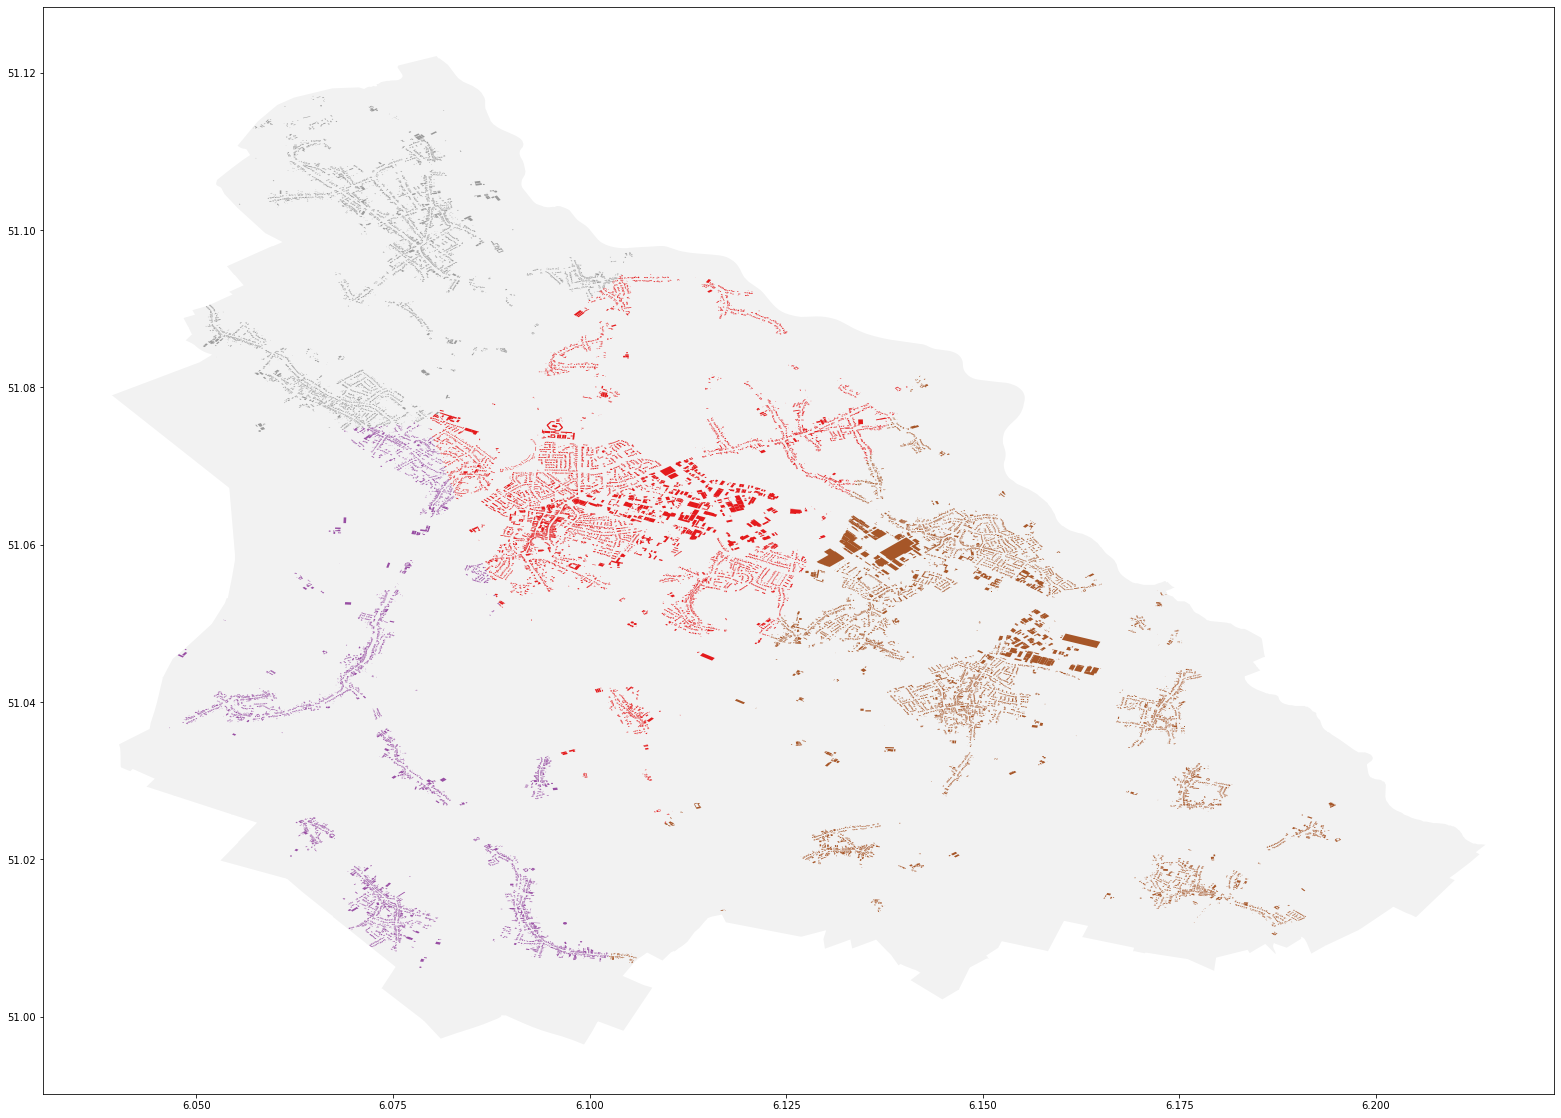

In [148]:
fig, ax = plt.subplots(figsize=(40,20))

# Plot the footprint
area.plot(ax=ax, facecolor='black', alpha=0.05)

red_buildings.plot(ax=ax, column='neighbourhood', cmap='Set1')

NameError: name 'edges' is not defined

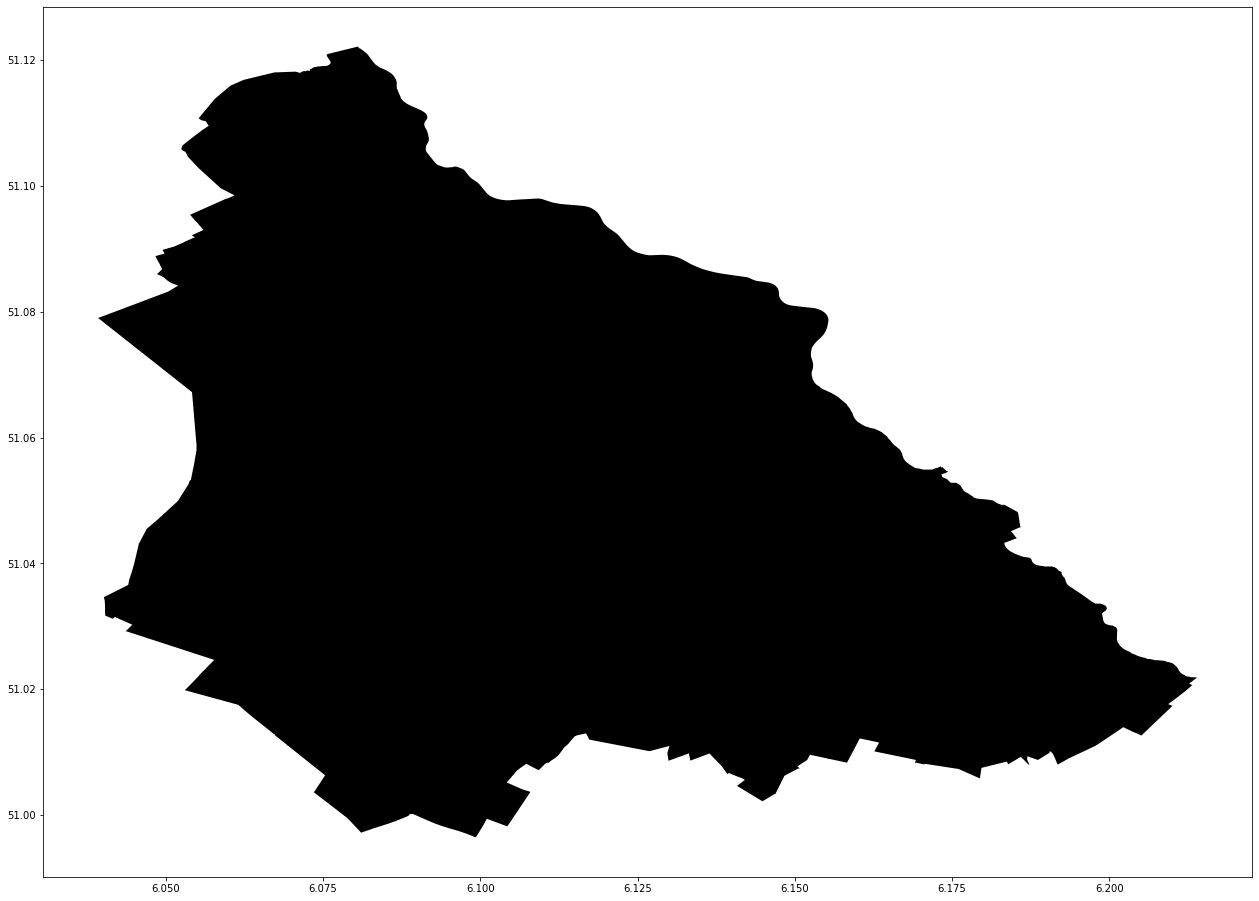

In [19]:

fig, ax = plt.subplots(figsize=(25,16))

# Plot the footprint
area.plot(ax=ax, facecolor='black')

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor='#BC8F8F')

# Plot buildings of interest and shops
bois.plot(ax=ax, facecolor='khaki', alpha=0.7)
shop.plot(ax=ax, facecolor='red', alpha=0.7)

# Plot hospitals
boish.plot(ax=ax, color='green', alpha=0.7, markersize=10)
plt.tight_layout()


In [ ]:
#idea check to see if ox.pois_from_place(place_name, amenities=buildings_of_interest) and ox.footprints_from_place(place_name) 
#do the same not finished but they are not, for Wedding!
bos = buildings[buildings['amenity'].isin(buildings_of_interest)]
bos

In [ ]:
shop = buildings[buildings.shop.notnull()]
#shop['shop'].unique()


In [ ]:
#start of different idea to access OpenStreetMap and retrive data
#aĺlows to make own queries with more variables than ameniety so longterm better solution
from OSMPythonTools.nominatim import Nominatim
#get area data by area name. very convenient
nominatim = Nominatim()
#get area data here id by area name
areaId = nominatim.query('Berlin, Germany').areaId()
areaId

In [ ]:
#here the query for the buildings will happen
from OSMPythonTools.overpass import overpassQueryBuilder, Overpass
buildings_of_interest = ['clinic',
                         'doctors',
                         'nursing_home',
                         'pharmacy',
                         'social_facility',
                         'hospital',
                         'school',
                         'kindergarten',
                         'university',
                         'library',
                         'marketplace']
#overpass is the nicest api to use, at least there were examples for this tool
overpass = Overpass()
#query to api, saddly right now only one selector possible but idea is to loop or find help
query = overpassQueryBuilder(area=areaId, elementType=['node','way', 'relation'], selector='"amenity"="hospital"', includeGeometry=True)
#saves data as some kind of formated list
result = overpass.query(query)
result

In [ ]:
import geopandas as gpd
#in result.elements list of the actual things. to my understanding in GeoJson format hope is that geopanda can use them
result.elements()[1]